In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
sli= pd.read_csv('SBI_Life_insurance.csv')
sli.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


age : age of policyholder 


sex: gender of policy holder (female=0, male=1) 


bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25


children: number of children / dependents of policyholder 


smoker: smoking state of policyholder (non-smoke=0;smoker=1) 


region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 


charges: individual medical costs billed by health insurance 


insuranceclaim: yes=1, no=0

In [3]:
# checking shape
sli.shape

(1338, 8)

In [4]:
# checking data type
sli.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [5]:
# checking the data description
sli.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
# checking null value
sli.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

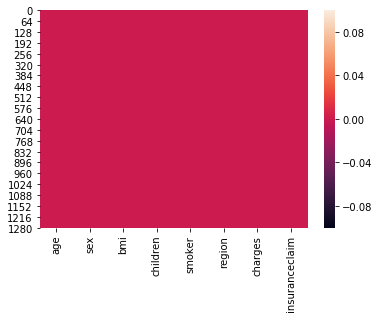

In [7]:
# heatmap of null value
sns.heatmap(sli.isnull())

In [8]:
# corelation between coloums
sli.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


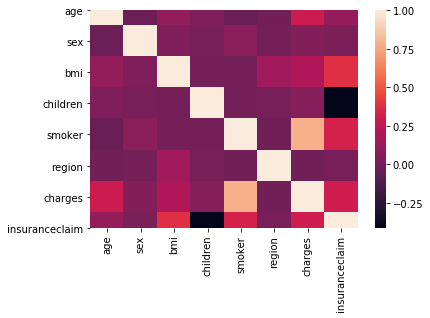

In [9]:
# heat map of corelation
sns.heatmap(sli.corr())

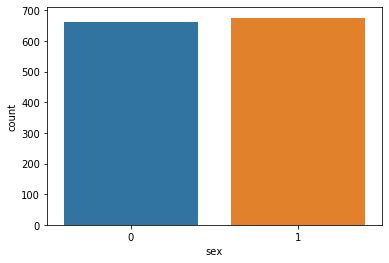

In [10]:
#checking count of male and female in provided data (female=0, male=1)
sns.countplot(x=sli['sex'],data=sli)

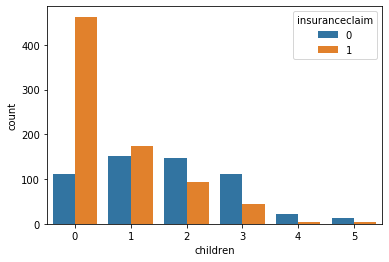

In [11]:
#does the number of childern affect the policyholder claim?
#children: number of children / dependents of policyholder
#insuranceclaim: yes=1, no=0
sns.countplot(x=sli['children'],data=sli,hue='insuranceclaim')

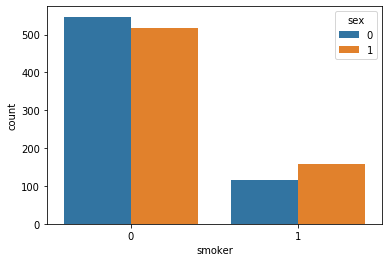

In [12]:
#checking count of smokers and none smoker along the gender
#non-smoke=0;smoker=1
#female=0, male=1
sns.countplot(x=sli['smoker'],data=sli,hue='sex')

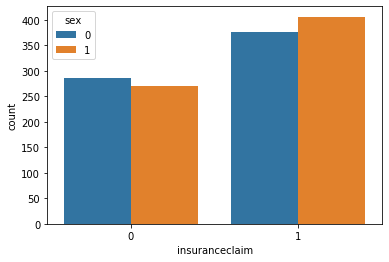

In [13]:
#Which policyholder as per gender tends to claim insurance 
#insuranceclaim: yes=1, no=0
#female=0, male=1
sns.countplot(x=sli['insuranceclaim'],data=sli,hue='sex')

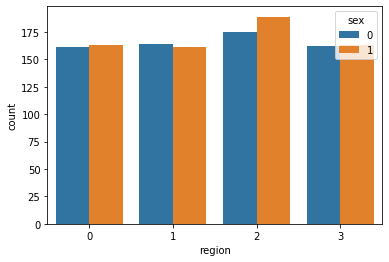

In [14]:
# checking count of data as per region along with sex
#US (northeast=0, northwest=1, southeast=2, southwest=3)
#female=0, male=1
sns.countplot(x=sli['region'],data=sli, hue='sex')

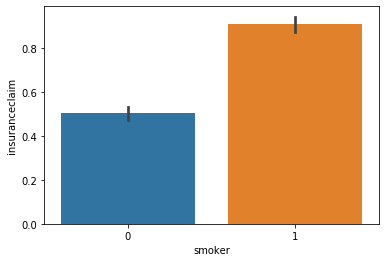

In [15]:
#Whose policy gets clamied smokers on non-smokers?
#smoker: smoking state of policyholder (non-smoke=0;smoker=1)
sns.barplot(x='smoker',y='insuranceclaim', data=sli)

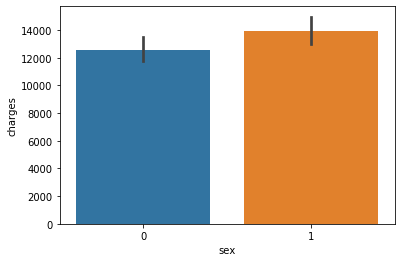

In [16]:
# charger paied by male policyholder vs female policyholder
#female=0, male=1
sns.barplot(x='sex', y='charges', data=sli)

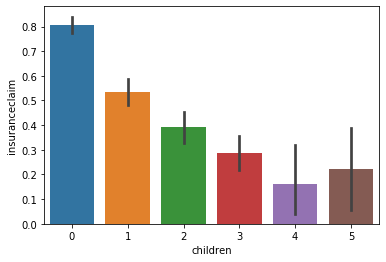

In [17]:
# insuranceclaimed by policyholder as per number of children
#insuranceclaim: yes=1, no=0
sns.barplot(x='children',y='insuranceclaim',data=sli)

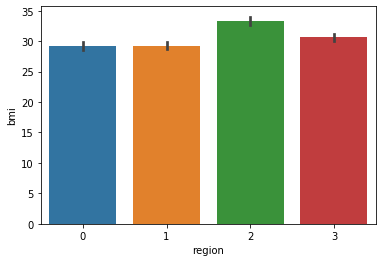

In [18]:
# insuranceclaimed by policyholder as per region
#US (northeast=0, northwest=1, southeast=2, southwest=3)
sns.barplot(x='region', y='bmi', data=sli)

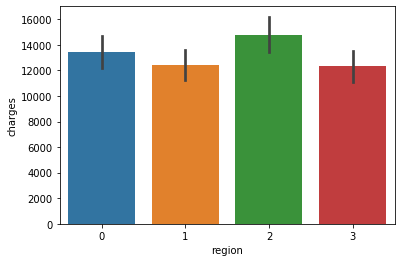

In [19]:
# charges paid by policyholder as per region
#US (northeast=0, northwest=1, southeast=2, southwest=3)
sns.barplot(x='region', y='charges', data=sli)

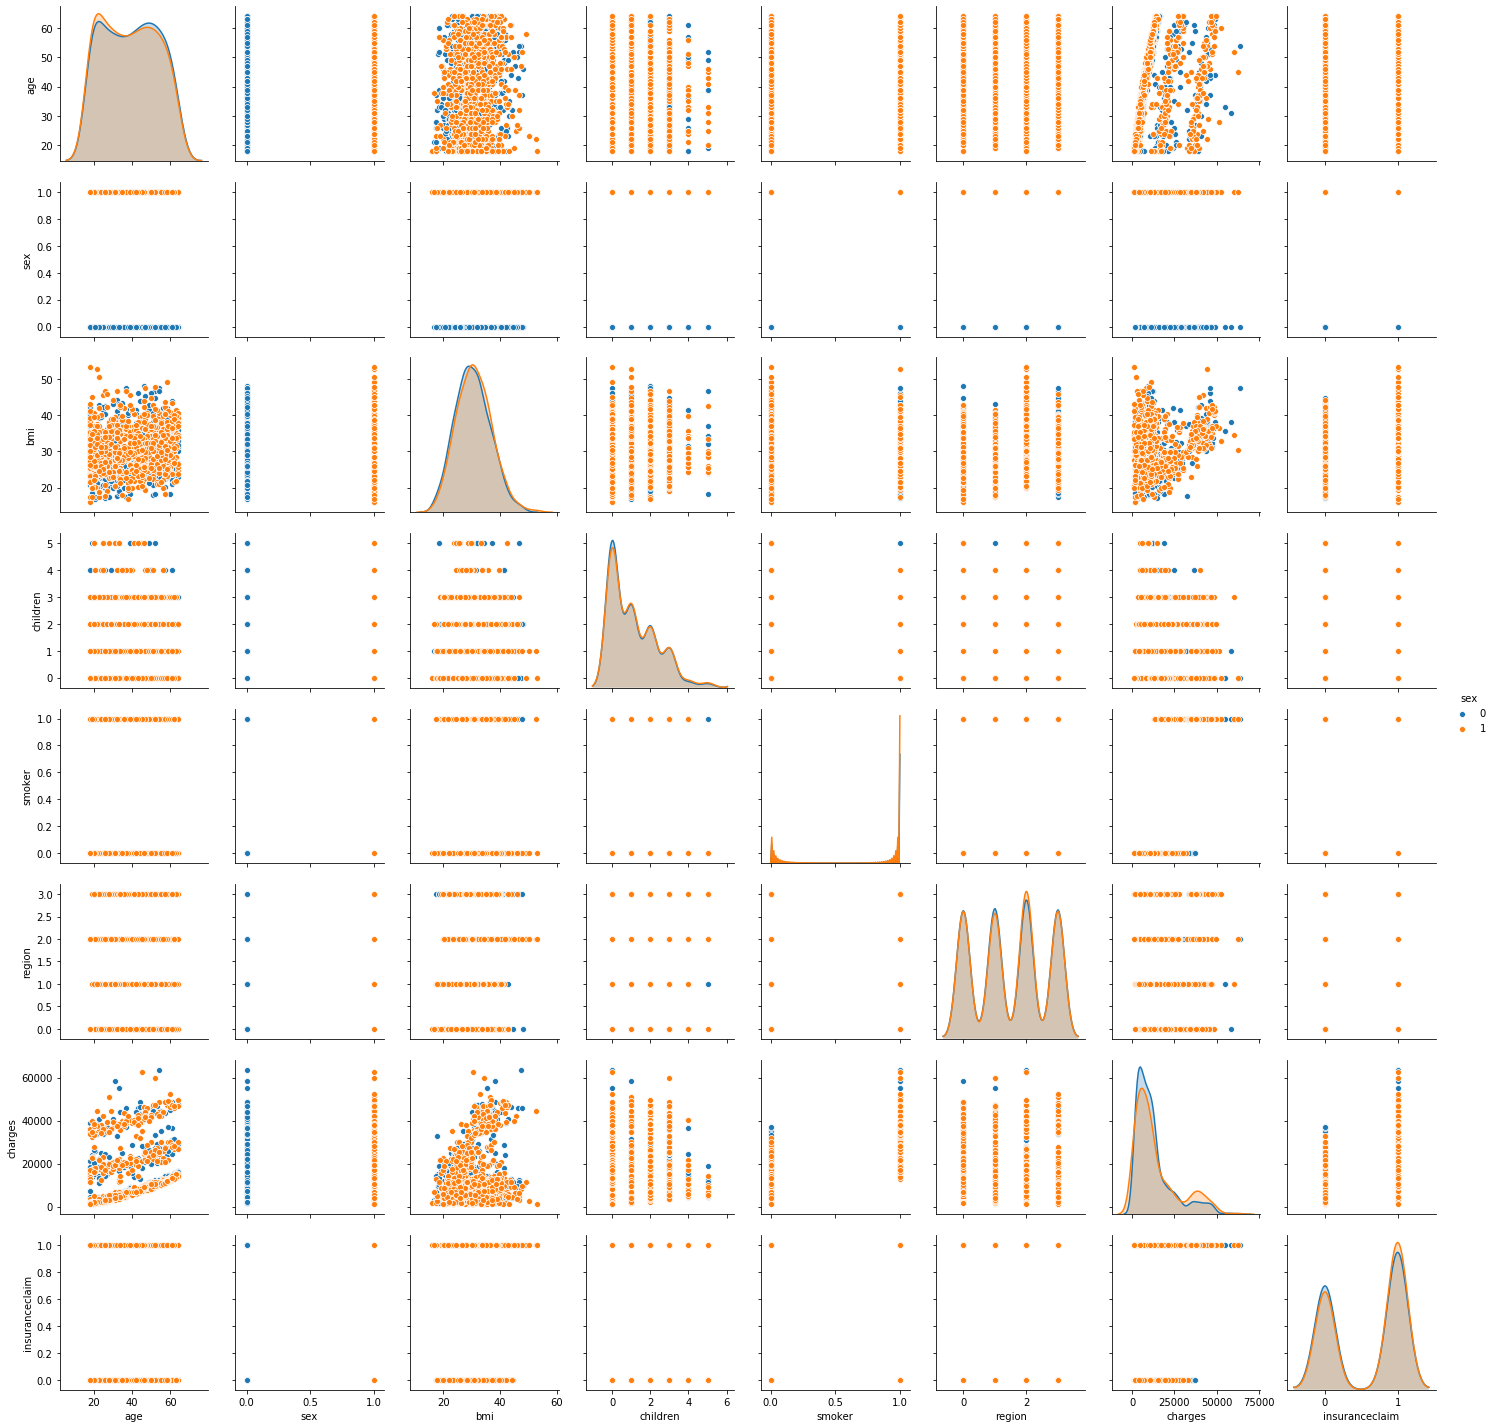

In [20]:
# pair plot to see the scatter of data using gender as hue for clear understanding
sns.pairplot(sli, hue='sex')

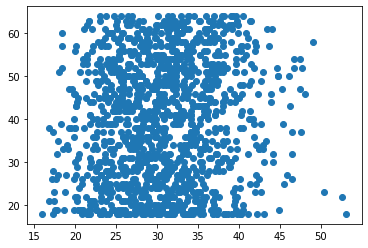

In [21]:
#does age and bmi have any connection?
plt.scatter('bmi','age',data=sli)

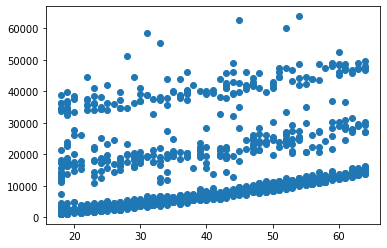

In [22]:
#Is age of the policyholder affect charges paid by policyholder?
plt.scatter('age','charges',data=sli)

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
sex               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
bmi               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
children             AxesSubplot(0.125,0.391471;0.227941x0.222059)
smoker            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
region            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
charges                 AxesSubplot(0.125,0.125;0.227941x0.222059)
insuranceclaim       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

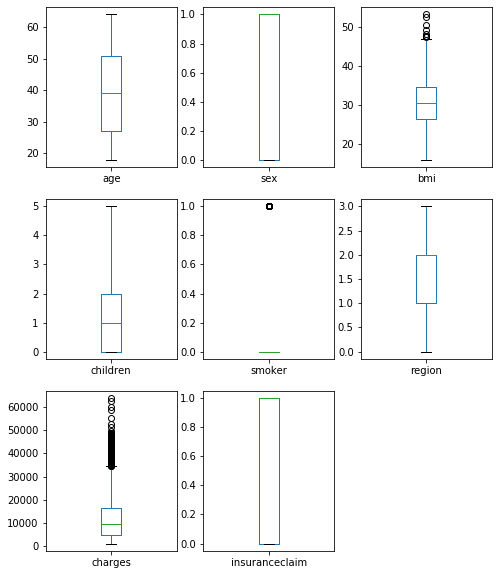

In [23]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
sli.plot(kind='box',subplots=True,layout=(3,3),figsize=(8,10))

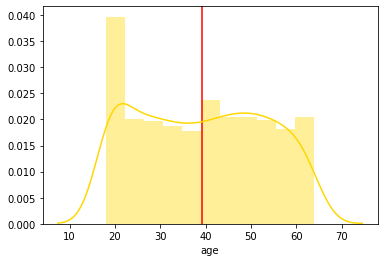

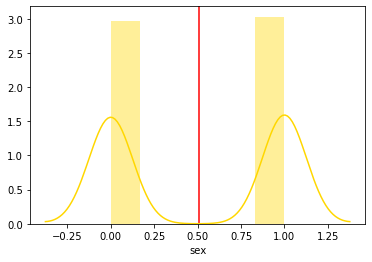

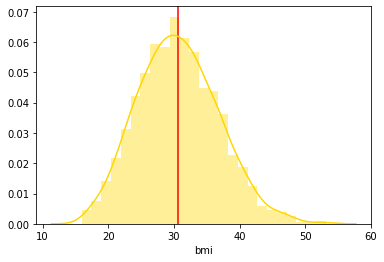

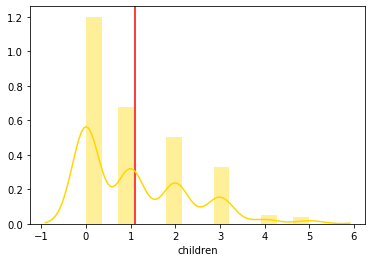

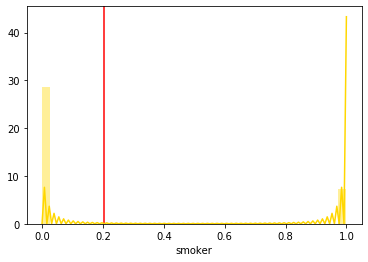

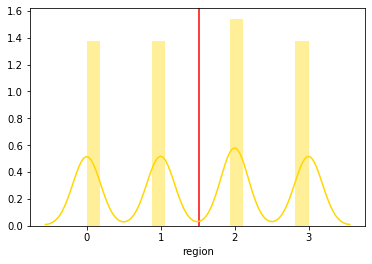

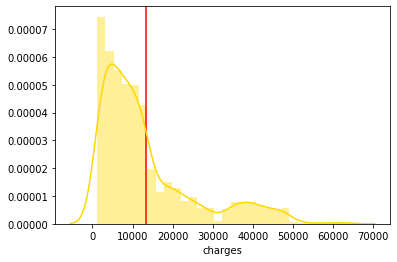

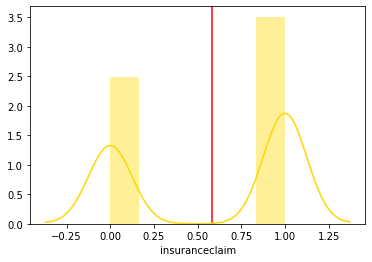

In [24]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(sli):
    
    #f, axes = plt.subplots(3, 3)
    plt.figure(i)
    plt.axvline(sli[col].mean(),color = 'r')
    sns.distplot(sli[col],color='gold')

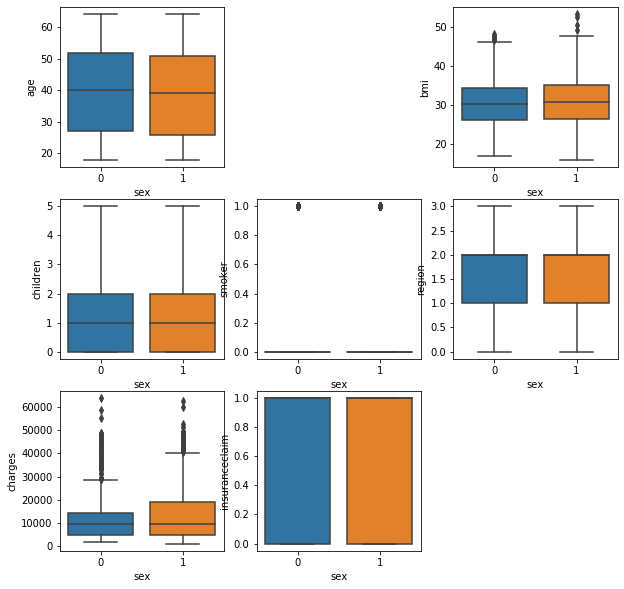

In [25]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires gender wise
figure(num=None, figsize=(10,10))
for column_index, column in enumerate(sli.columns):
    if column == 'sex':
        continue
    plt.subplot(3, 3, column_index+1)
    sns.boxplot(x='sex', y=column, data=sli)

In [26]:
#checking skewness
sli.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [27]:
#removing skewness
for col in sli.columns:
    if sli.skew().loc[col]>0.55:
        sli[col]=np.cbrt(sli[col])
sli.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children         -0.097116
smoker            1.464766
region           -0.038101
charges           0.515183
insuranceclaim   -0.346254
dtype: float64

In [28]:
#removing outlires
z=abs(zscore(sli))
print(sli.shape)
sli1=sli.loc[(z<3).all(axis=1)]
print(sli1.shape)

(1338, 8)
(1334, 8)


In [29]:
# dividing dataset into input values 'x' and output value 'y'
x=sli.iloc[:,0:-1]
print('x dataset\n',x.sample(5),'\n')
y=sli.iloc[:,-1]
print('y datase\n',y.sample(5))

x dataset
      age  sex     bmi  children  smoker  region    charges
343   63    1  36.765  0.000000     0.0       0  24.091003
869   25    0  24.300  1.442250     0.0       3  16.376056
403   49    1  32.300  1.442250     0.0       1  21.736146
258   51    1  24.415  1.587401     0.0       1  22.584930
857   25    1  24.130  0.000000     1.0       1  25.102505 

y datase
 938     0
1000    0
449     0
617     1
865     0
Name: insuranceclaim, dtype: int64


In [30]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [31]:
#creating models array with all the model, along with few blank array for further use
Model_array=[]
Random_state=[]
Max_accuracy_array=[]
Cross_val_score_array=[]
Standard_Deviation=[]
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [32]:
# loop to find out the maximum accuracy of all the model in models array along the range of random state
for name,model in Models:
    max_accuracy=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,stratify=y,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        accuracy=accuracy_score(test_y,pred)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_accuracy_array.append(max_accuracy)

In [33]:
# loop to find out the cross_val_score of all the model in models array along the range of random state
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='accuracy')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [34]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'Accuracy': Max_accuracy_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
5,GradientBoostingClassifier,1.000000,35
4,DecisionTreeClassifier,0.996269,25
7,RandomForestClassifier,0.977612,44
0,SVC,0.947761,86
8,KNeighborsClassifier,0.906716,16
3,LogisticRegression,0.891791,16
6,LinearDiscriminantAnalysis,0.888060,16
9,QuadraticDiscriminantAnalysis,0.888060,97
2,SGDClassifier,0.876866,20
1,GaussianNB,0.832090,95


In [35]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
4,DecisionTreeClassifier,0.985047,0.012538
5,GradientBoostingClassifier,0.979043,0.015315
7,RandomForestClassifier,0.940209,0.017018
0,SVC,0.899080,0.019949
8,KNeighborsClassifier,0.862496,0.025398
9,QuadraticDiscriminantAnalysis,0.845270,0.027720
3,LogisticRegression,0.844507,0.026304
6,LinearDiscriminantAnalysis,0.842279,0.026937
2,SGDClassifier,0.820587,0.039145
1,GaussianNB,0.777242,0.039018


### Since accuracy obtained by DecisionTreeClassifier is 0.996269 and mean of cross val accuracy is DecisionTreeClassifier 0.985047.

It is quite evident that the diffrence is least between accuracy and cross val score for this model, which prove that model is perfect fit.

Model score is: 1.0 

Accuracy score of model is :  0.996268656716418 

Precision score of model is : 0.9936708860759493 

Recall score of model is : 1.0 

Log loss score of model is : 0.1288790148967953 

F1_score score of model is : 0.9968253968253968 

The mean of cross_val_score for themodel is: 0.9776376004947434 

Confusion matrix for themodel is : 
 [[110   1]
 [  0 157]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.99      1.00      1.00       157

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268
 



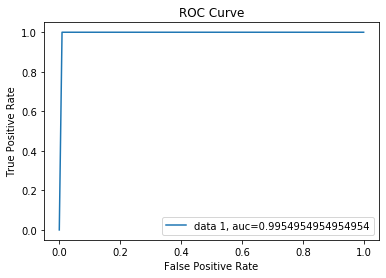

In [36]:
dtc=DecisionTreeClassifier(random_state=10)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=25,stratify=y,shuffle=True)
dtc.fit(train_x,train_y)
pred=dtc.predict(test_x)
predict_proba = dtc.predict_proba(test_x)[::,1]
score=cross_val_score(dtc,train_x,train_y,cv=14,scoring='accuracy').mean()

print('Model score is:',dtc.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('Log loss score of model is :',log_loss(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')
print('The mean of cross_val_score for themodel is:',score,'\n')
print('Confusion matrix for themodel is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 2 SBI_Life_insurance prediction.csv')

In [38]:
# saving the model using pickle.
joblib.dump(dtc,'dtc_Project 2 SBI_Life_insurance.pkl')

['dtc_Project 2 SBI_Life_insurance.pkl']